In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Initialize Resnet 
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top = False)

In [10]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [25]:
 # don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [26]:
folders = glob('Datasets/Train/*')

In [27]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [28]:
 # our Layer - you cand add more if you want 
x = Flatten()(resnet.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [30]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [31]:
# tell the model what cost and optimaization method to use 
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

In [32]:
# Use the Image data generator to import the images 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trian_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=.2,
                                 zoom_range=.2,
                                 horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1./255)



In [41]:
# Make the size of  target image the same with the initial image 
training_set = trian_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [42]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [43]:
# fit the model 
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
 
)

c:\users\ahmed\anaconda3\envs\car_brand\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 11s 6s/step - loss: 8.3979 - accuracy: 0.3281 - val_loss: 3.2530 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 5.9973 - accuracy: 0.3281 - val_loss: 9.8398 - val_accuracy: 0.1897
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 7.1457 - accuracy: 0.4375 - val_loss: 12.3766 - val_accuracy: 0.2931
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 7.5554 - accuracy: 0.5000 - val_loss: 10.0100 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 7s 5s/step - loss: 5.3663 - accuracy: 0.4531 - val_loss: 4.4357 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 9s 6s/step - loss: 2.2651 - accuracy: 0.4531 - val_loss: 2.7032 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 3.5984 - accuracy: 0.4062 - val_loss: 2.1499 - val_accuracy: 0.6034
Epoch 8/50
2/2 [=====================

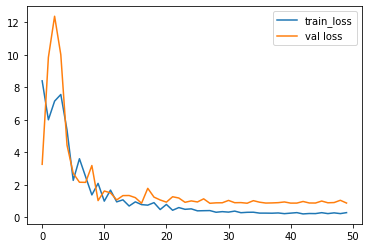

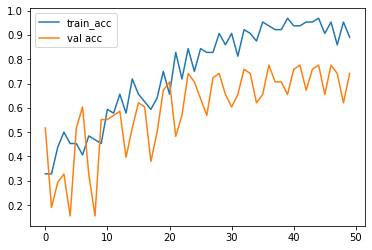

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss 
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'],label ='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'],label ='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save the model

from tensorflow.keras.models import load_model
model.save('modle_resnet50.h5')

In [45]:
y_pred = model.predict(test_set)

In [46]:
y_pred

array([[9.16627705e-01, 4.58528697e-02, 3.75194475e-02],
       [5.70310235e-01, 2.55578965e-01, 1.74110830e-01],
       [8.77394457e-04, 9.96013284e-01, 3.10929865e-03],
       [1.97094604e-02, 6.47122562e-01, 3.33167970e-01],
       [6.11113431e-03, 5.88365793e-01, 4.05523121e-01],
       [1.94696803e-02, 9.31196034e-01, 4.93343249e-02],
       [2.51306780e-02, 9.13583100e-01, 6.12862147e-02],
       [4.33160141e-02, 6.27273142e-01, 3.29410762e-01],
       [1.12575563e-02, 9.15029585e-01, 7.37127438e-02],
       [2.12476909e-01, 5.44325233e-01, 2.43197829e-01],
       [9.67398584e-01, 1.90259814e-02, 1.35754719e-02],
       [1.68618634e-02, 7.05878139e-01, 2.77260005e-01],
       [3.21613140e-02, 3.16575974e-01, 6.51262641e-01],
       [1.17899181e-05, 1.09506553e-04, 9.99878645e-01],
       [2.33751759e-02, 6.12125397e-01, 3.64499420e-01],
       [5.55611355e-03, 9.71549034e-01, 2.28947867e-02],
       [1.74525045e-02, 2.34729841e-01, 7.47817576e-01],
       [2.75473267e-01, 6.86218

In [47]:
y_pred = np.argmax(y_pred,axis=1)

In [48]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
img = image.load_img('Datasets/test/lamborghini/10.jpg',target_size=(224,224))

In [52]:
x =image.img_to_array(img)
x


array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [53]:
x.shape

(224, 224, 3)

In [55]:
x=x/255
x

array([[[2.6143793e-04, 1.0765091e-04, 0.0000000e+00],
        [2.6143793e-04, 1.0765091e-04, 0.0000000e+00],
        [2.6143793e-04, 1.0765091e-04, 0.0000000e+00],
        ...,
        [1.9992310e-04, 3.0757405e-05, 0.0000000e+00],
        [2.1530181e-04, 6.1514809e-05, 4.6136101e-05],
        [2.1530181e-04, 6.1514809e-05, 4.6136101e-05]],

       [[2.6143793e-04, 1.0765091e-04, 0.0000000e+00],
        [2.6143793e-04, 1.0765091e-04, 0.0000000e+00],
        [2.7681663e-04, 1.2302962e-04, 0.0000000e+00],
        ...,
        [2.1530181e-04, 4.6136101e-05, 1.5378702e-05],
        [2.1530181e-04, 6.1514809e-05, 4.6136101e-05],
        [2.1530181e-04, 6.1514809e-05, 4.6136101e-05]],

       [[2.7681663e-04, 1.2302962e-04, 0.0000000e+00],
        [2.7681663e-04, 1.2302962e-04, 0.0000000e+00],
        [2.9219533e-04, 1.3840832e-04, 0.0000000e+00],
        ...,
        [2.1530181e-04, 4.6136101e-05, 1.5378702e-05],
        [2.1530181e-04, 6.1514809e-05, 4.6136101e-05],
        [2.1530181e-04

In [56]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

array([[0.02750099, 0.01299337, 0.9595057 ]], dtype=float32)

In [58]:
a = np.argmax(model.predict(img_data),axis=1)

In [59]:
a

array([2], dtype=int64)